In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

DATA_DIR = "../data"
MODEL_DIR = "../models"

print("Data dir:", DATA_DIR)
print("Model dir:", MODEL_DIR)

Data dir: ../data
Model dir: ../models


In [3]:
# Load test arrays
test_x = np.load(os.path.join(DATA_DIR, "test_x.npy"))
test_y = np.load(os.path.join(DATA_DIR, "test_y.npy"))

# Load best saved model
model_path = os.path.join(MODEL_DIR, "emotion_model.h5")
model = load_model(model_path)

print("Test set:", test_x.shape, test_y.shape)



Test set: (7178, 48, 48, 1) (7178,)


In [4]:
# One-hot encode test labels
NUM_CLASSES = len(np.unique(test_y))
test_y_cat = tf.keras.utils.to_categorical(test_y, NUM_CLASSES)

# Evaluate
loss, acc = model.evaluate(test_x, test_y_cat, verbose=1)
print(f"✅ Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")


225/225 [==============================] - 4s 16ms/step - loss: 1.2245 - accuracy: 0.6218
✅ Test Accuracy: 0.6218, Test Loss: 1.2245


In [5]:
# Predictions
y_pred = model.predict(test_x)
y_pred_classes = np.argmax(y_pred, axis=1)

# Report
print(classification_report(test_y, y_pred_classes))

225/225 [==============================] - 3s 14ms/step
              precision    recall  f1-score   support

           0       0.51      0.58      0.54       958
           1       0.73      0.22      0.33       111
           2       0.52      0.31      0.38      1024
           3       0.79      0.87      0.83      1774
           4       0.55      0.66      0.60      1233
           5       0.49      0.51      0.50      1247
           6       0.79      0.70      0.74       831

    accuracy                           0.62      7178
   macro avg       0.63      0.55      0.56      7178
weighted avg       0.62      0.62      0.61      7178



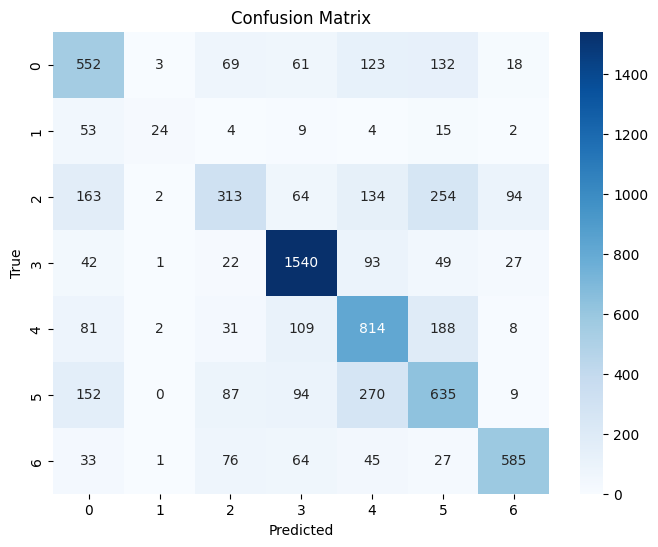

In [6]:
cm = confusion_matrix(test_y, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

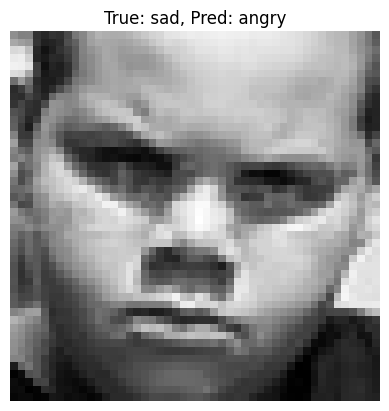

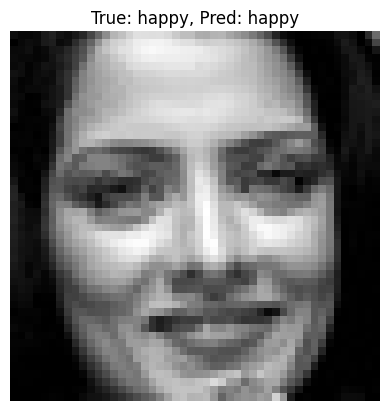

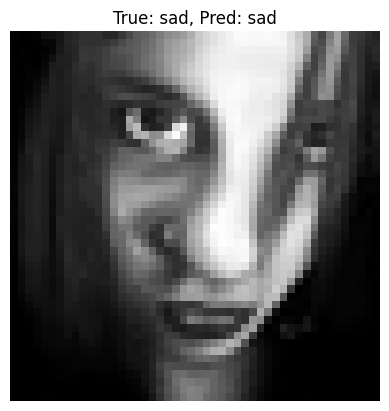

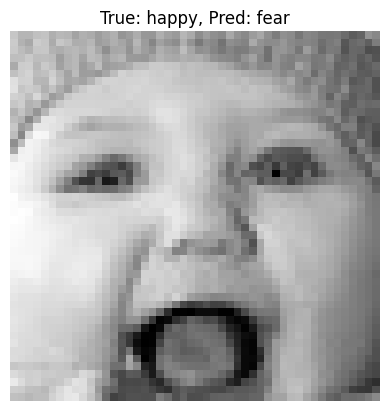

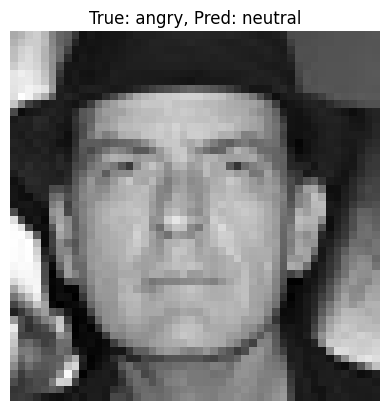

In [7]:
label_map = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'neutral', 5:'sad', 6:'surprise'}

for i in range(5):
    idx = np.random.randint(0, len(test_x))
    plt.imshow(test_x[idx].squeeze(), cmap="gray")
    plt.title(f"True: {label_map[test_y[idx]]}, Pred: {label_map[y_pred_classes[idx]]}")
    plt.axis("off")
    plt.show()